<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Aggregation-and-Grouping" data-toc-modified-id="Data-Aggregation-and-Grouping-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Aggregation and Grouping</a></span><ul class="toc-item"><li><span><a href="#Aggregation" data-toc-modified-id="Aggregation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Aggregation</a></span></li><li><span><a href="#Grouping" data-toc-modified-id="Grouping-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Grouping</a></span><ul class="toc-item"><li><span><a href="#Iterating-GroupBy-object" data-toc-modified-id="Iterating-GroupBy-object-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Iterating GroupBy object</a></span></li><li><span><a href="#groups" data-toc-modified-id="groups-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span><code>groups</code></a></span></li><li><span><a href="#size" data-toc-modified-id="size-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span><code>size</code></a></span></li><li><span><a href="#get_group()" data-toc-modified-id="get_group()-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span><code>get_group()</code></a></span></li><li><span><a href="#Applying-aggregations" data-toc-modified-id="Applying-aggregations-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Applying aggregations</a></span></li><li><span><a href="#Multiple-Aggregations" data-toc-modified-id="Multiple-Aggregations-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span>Multiple Aggregations</a></span></li><li><span><a href="#Grouping-by-Multiple-Variables" data-toc-modified-id="Grouping-by-Multiple-Variables-1.2.7"><span class="toc-item-num">1.2.7&nbsp;&nbsp;</span>Grouping by Multiple Variables</a></span></li></ul></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#💡-Check-for-understanding" data-toc-modified-id="💡-Check-for-understanding-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>💡 Check for understanding</a></span></li></ul></li></ul></li></ul></div>

# Data Aggregation and Grouping 

Data aggregation and grouping are fundamental operations in data analysis. They involve combining multiple pieces of data into a single result. For instance, you may want to group data by certain variables and then calculate summary statistics like count, mean, sum, or standard deviation.

In [2]:
import pandas as pd

# Load the dataset
url = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/titanic_train.csv'
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Aggregation

Aggregation in pandas involves applying a function to a dataset, transforming multiple values into a single value. pandas provides various aggregation functions, including:

- `mean()`: Compute the arithmetic mean.
- `sum()`: Compute the sum of values.
- `min()`: Compute the minimum value.
- `max()`: Compute the maximum value.
- `count()`: Count the number of non-null values.
- `std()`: Compute the standard deviation.

For instance, to find the mean value of a numerical column, use the `mean()` function:

In [2]:
df['Fare'].mean()

32.204207968574636

In [3]:
df.select_dtypes('number').mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [4]:
df.select_dtypes('number').median()

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

In [5]:
df.select_dtypes('number').min()

PassengerId    1.00
Survived       0.00
Pclass         1.00
Age            0.42
SibSp          0.00
Parch          0.00
Fare           0.00
dtype: float64

<Axes: >

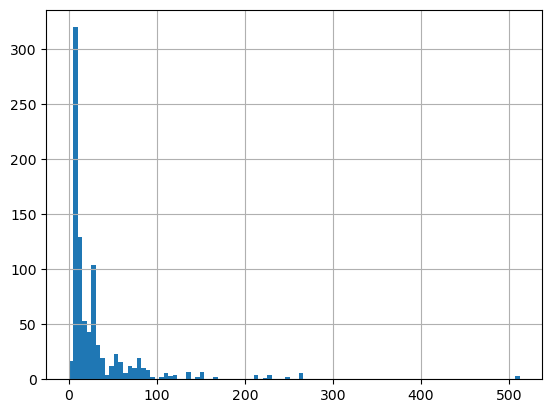

In [8]:
df['Fare'].hist(bins=100)

## Grouping

Grouping is the process of splitting the data into groups based on certain criteria. The `groupby()` function is used for this purpose.

In [3]:
grouped = df.groupby('Sex')
grouped

### Iterating GroupBy object

The `groupby()` function in pandas returns a `GroupBy` object that can be iterated over. Each iteration provides a tuple where the first item is the group identifier and the second item is the data in that group as a DataFrame.

In [4]:
# Iterate over each group
for name, group in grouped:
    print(f"Group name: {name}")
    print(group)

Group name: female
     PassengerId  Survived  Pclass  \
1              2         1       1   
2              3         1       3   
3              4         1       1   
8              9         1       3   
9             10         1       2   
..           ...       ...     ...   
880          881         1       2   
882          883         0       3   
885          886         0       3   
887          888         1       1   
888          889         0       3   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
..                                                

In [5]:
# The number of groups by gender (`len(grouped)`) is equal to the number of unique elements in that category.

df['Sex'].nunique() == len(grouped)

True

### `groups`
The `groups` attribute of a pandas `GroupBy` object is a dictionary. The keys of this dictionary are the computed unique groups and the corresponding values are the axis labels belonging to each group.

In [ ]:
#Will get you the idenx of each value in the column
grouped.groups

{'female': [1, 2, 3, 8, 9, 10, 11, 14, 15, 18, 19, 22, 24, 25, 28, 31, 32, 38, 39, 40, 41, 43, 44, 47, 49, 52, 53, 56, 58, 61, 66, 68, 71, 79, 82, 84, 85, 88, 98, 100, 106, 109, 111, 113, 114, 119, 123, 128, 132, 133, 136, 140, 141, 142, 147, 151, 156, 161, 166, 167, 172, 177, 180, 184, 186, 190, 192, 194, 195, 198, 199, 205, 208, 211, 215, 216, 218, 229, 230, 233, 235, 237, 240, 241, 246, 247, 251, 254, 255, 256, 257, 258, 259, 264, 268, 269, 272, 274, 275, 276, ...], 'male': [0, 4, 5, 6, 7, 12, 13, 16, 17, 20, 21, 23, 26, 27, 29, 30, 33, 34, 35, 36, 37, 42, 45, 46, 48, 50, 51, 54, 55, 57, 59, 60, 62, 63, 64, 65, 67, 69, 70, 72, 73, 74, 75, 76, 77, 78, 80, 81, 83, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 101, 102, 103, 104, 105, 107, 108, 110, 112, 115, 116, 117, 118, 120, 121, 122, 124, 125, 126, 127, 129, 130, 131, 134, 135, 137, 138, 139, 143, 144, 145, 146, 148, 149, 150, 152, 153, 154, 155, ...]}

### `size`

The `size` attribute of a pandas `GroupBy` object returns a Series giving the size (i.e., the number of items) of each group. This is like applying the `count()` function to each group, but `size` includes `NaN` values and `count` does not. 



In [7]:
grouped.size()

Sex
female    314
male      577
dtype: int64

### `get_group()`

The `get_group` method is used to select a single group from a `GroupBy` object as a DataFrame. You provide the name of the group you want to select as an argument.

In [8]:
grouped.get_group('female').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Applying aggregations

Once the data is split into groups, you need a way to represent each group in the resulting output. That's where aggregation functions come in.

For example, if you group a DataFrame by a categorical variable (like 'City'), you'll end up with a separate group for each unique city in your data. But how do you want to represent each city in your result? Do you want the mean of another variable (like 'Sales') for each city? The sum? The maximum? This is what the aggregation function determines.

When you apply an aggregation function after a `groupby()`, pandas applies that function to each group separately and then combines the results into a new DataFrame.

In [11]:
df.groupby('Sex')['Age'].mean() # Get the mean of each variable grouped by Sex

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [13]:
# Let's find the average age of the passengers grouped by their gender

df.groupby('Sex')['Age'].median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [14]:
df.groupby('Sex')['Fare'].mean()

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

In [15]:
df.groupby('Sex')['Fare'].median()

Sex
female    23.0
male      10.5
Name: Fare, dtype: float64

In [16]:
df.groupby('Sex')['Pclass'].median()

Sex
female    2.0
male      3.0
Name: Pclass, dtype: float64

### Multiple Aggregations

You can perform multiple aggregations at once using the `agg()` function. 

For example, let's find the count, mean, and standard deviation of the age of passengers, grouped by their gender:

In [ ]:
df.groupby('Sex')['Age'].agg(['count', 'mean', 'std'])

In [17]:
df.groupby('Sex')['Fare'].agg(['mean', 'median', 'max', 'min'])

,mean,median,max,min
Sex,,,,
female,44.479818,23.0,512.3292,6.75
male,25.523893,10.5,512.3292,0.00


In [ ]:
df[]

### Grouping by Multiple Variables

You can group by multiple variables by passing a list to the `groupby()` function.

For example, let's find the average age of passengers grouped by their gender and whether they survived:

In [21]:
df.groupby(['Sex', 'Pclass'])['Fare'].agg(['mean', 'median', 'count']).round()

mean  median  count
Sex    Pclass                      
female 1       106.0    83.0     94
       2        22.0    22.0     76
       3        16.0    12.0    144
male   1        67.0    41.0    122
       2        20.0    13.0    108
       3        13.0     8.0    347

In [24]:
First_class_df = df[df.Pclass ==1]

In [25]:
First_class_df.groupby(['Sex', 'Parch'])['Fare'].agg(['mean', 'median', 'count']).round()

mean  median  count
Sex    Parch                      
female 0       95.0    79.0     64
       1      111.0    83.0     17
       2      153.0   152.0     13
male   0       51.0    34.0     99
       1      120.0    77.0     14
       2      147.0   120.0      8
       4      263.0   263.0      1

In [18]:
df.groupby(['Sex', 'Survived'])['Age'].mean()

Sex     Survived
female  0           25.046875
        1           28.847716
male    0           31.618056
        1           27.276022
Name: Age, dtype: float64

In [27]:
df[df.Age<10].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C


In [28]:
df.groupby(['Sex', 'Cabin'])['Fare'].agg(['mean', 'median', 'count']).round()

mean  median  count
Sex    Cabin                     
female A16    40.0    40.0      1
       B18    58.0    58.0      2
       B20    57.0    57.0      1
       B22    71.0    71.0      1
       B28    80.0    80.0      2
...            ...     ...    ...
male   F G73   8.0     8.0      2
       F2     26.0    26.0      3
       F38     8.0     8.0      1
       F4     39.0    39.0      1
       T      36.0    36.0      1

[171 rows x 3 columns]

In [34]:
import numpy as np
First_class_df['has_cabin'] = df['Cabin'].apply(lambda x: True if x is not np.NaN else False)
First_class_df.groupby(['Sex', 'has_cabin'])['Fare'].agg(['mean', 'median', 'count']).round()

C:\Users\UTILISATEUR\AppData\Local\Temp\ipykernel_26980\1533883432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  First_class_df['has_cabin'] = df['Cabin'].apply(lambda x: True if x is not np.NaN else False)


mean  median  count
Sex    has_cabin                      
female False      138.0   106.0     13
       True       101.0    80.0     81
male   False       48.0    28.0     27
       True        73.0    52.0     95

In [ ]:
df.Cabin.unique()
#Some people have multiple cabin

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [36]:
First_class_df['cabin_no'] = First_class_df['Cabin'].apply(lambda x: len(x.split(" ")) if x is not np.NaN else 0)
First_class_df.groupby(['Sex', 'cabin_no'])['Fare'].agg(['mean', 'median', 'count']).round()

C:\Users\UTILISATEUR\AppData\Local\Temp\ipykernel_26980\936854740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  First_class_df['cabin_no'] = First_class_df['Cabin'].apply(lambda x: len(x.split(" ")) if x is not np.NaN else 0)


mean  median  count
Sex    cabin_no                      
female 0         138.0   106.0     13
       1          86.0    78.0     71
       2         170.0   152.0      6
       3         263.0   263.0      2
       4         262.0   262.0      2
male   0          48.0    28.0     27
       1          60.0    50.0     85
       2         130.0   120.0      6
       3         261.0   263.0      4

In [37]:
First_class_df['cabin_type'] = First_class_df['Cabin'].apply(lambda x: x[0] if x is not np.NaN else 0)
First_class_df.groupby(['Sex', 'cabin_type'])['Fare'].agg(['mean', 'median', 'count']).round()

C:\Users\UTILISATEUR\AppData\Local\Temp\ipykernel_26980\2206154604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  First_class_df['cabin_type'] = First_class_df['Cabin'].apply(lambda x: x[0] if x is not np.NaN else 0)


mean  median  count
Sex    cabin_type                      
female 0           138.0   106.0     13
       A            40.0    40.0      1
       B           116.0    86.0     27
       C           117.0    90.0     27
       D            67.0    77.0     16
       E            79.0    68.0     10
male   0            48.0    28.0     27
       A            40.0    36.0     14
       B           110.0    66.0     20
       C            86.0    60.0     32
       D            59.0    53.0     13
       E            40.0    27.0     15
       T            36.0    36.0      1

In [38]:
First_class_df.groupby(['Sex', 'Embarked'])['Fare'].agg(['mean', 'median', 'count']).round()

mean  median  count
Sex    Embarked                      
female C         116.0    83.0     43
       Q          90.0    90.0      1
       S          99.0    80.0     48
male   C          94.0    62.0     42
       Q          90.0    90.0      1
       S          53.0    35.0     79

# Summary

- Aggregation involves applying a function to a dataset that reduces multiple values into a single value. Common aggregation functions in pandas include `mean()`, `sum()`, `min()`, `max()`, `count()`, and `std()`.
- Grouping in pandas is done using the `groupby()` function, which splits data into groups based on certain criteria. The grouped data can then be aggregated separately.
    - A `GroupBy` object can be iterated over, with each iteration yielding a tuple where the first item is the group identifier, and the second item is the data in that group as a DataFrame.
    - The `groups` attribute of a `GroupBy` object is a dictionary where the keys are the computed unique groups, and the corresponding values are the axis labels belonging to each group.
    - The `size` attribute of a `GroupBy` object returns a Series giving the size of each group. Unlike the `count()` function, `size` includes `NaN` values.
    - The `get_group()` method of a `GroupBy` object allows for the selection of a single group as a DataFrame.
- After a `groupby()` operation, an aggregation function is necessary to represent each group in the resulting output.
- Multiple aggregations can be performed at once using the `agg()` function.
- Grouping can be done by multiple variables by passing a list to the `groupby()` function. This can be helpful when you want to analyze your data at different levels of granularity.

### 💡 Check for understanding

Using the Titanic dataset (`'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/titanic_train.csv'`), perform the following operations and **write your conclusions after each step**:

- Calculate the number, mean, and standard deviation of the 'Fare' paid by passengers, grouped by their 'Sex'.

- Determine the number of survivors and non-survivors by class (use 'Pclass' variable).

- Determine the number of survivors and non-survivors by gender.

- Use the `get_group` method to select the group of 1st Class passengers and display the first 5 rows of this group. Then, group by 'Survived' within the first class group, and calculate the average fare.

- Create a new column 'AgeGroup' . This column should categorize passengers as 'Child' (age <= 12), 'Teen' (12 < age <=18), 'Adult' (18 < age <= 60), and 'Senior' (age > 60). Then, find out how many survivors are there in each age group.

- BONUS: calculate the survival rates within each age group in percentages.

In [ ]:
# Your code here